# Como criar uma estratégia de trading com Python

### Indicador usado: RSI

### Estratégia:

Vamos comprar a ação sempre que o RSI for menor do que 30.

Será que dá dinheiro?

# Passo a Passo:


* Passo 1: Escolher um ativo.
* Passo 2: Puxar os dados de cotações no Yahoo finance.
* Passo 3: Calcular os retornos positivos e negativos.
* Passo 4: Separar os retornos positivos dos negativos.
* Passo 5: Calcular a média dos retornos positivos e negativos nos últimos 22 dias
* Passo 6: Calcular o RSI
* Passo 7: Gerar os sinais de compra ou venda
* Passo 8: Observando pontos de compra ao longo do tempo
* Passo 9: Calculando lucros
* Passo 10: Analisando lucros
<br>

    * Qual a média de lucros?
    * Qual a média de perdas?
    * Qual a % de operações vencedoras?
    * Qual expectativa matemática do modelo?
    * Qual retorno acumulado?
    * O retorno acumulado venceu o Buy and Hold na ação?


### Fórmula RSI:

$100 - 100/(1 + mediaRetornosPositivos / mediaRetornosNegativos)$

In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

pd.options.mode.chained_assignment = None

# Passo 1: Escolher um ativo

In [2]:
ativo = 'PETR4.SA'

# Passo 2: Puxar os dados do Yahoo Finance

In [3]:
dados_ativo = yf.download(ativo)

dados_ativo

#tome cuidado com ações muito antigas! As vezes vão ter os dados mas com volume zero.
#Pegue um período que tenha volume

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.506322,35389440000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.422993,28861440000
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.408634,43033600000
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.403763,34055680000
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.410173,20912640000
...,...,...,...,...,...,...
2023-09-26,34.000000,34.090000,33.459999,33.459999,33.459999,60687500
2023-09-27,33.860001,34.520000,33.779999,34.520000,34.520000,53708700
2023-09-28,34.450001,34.540001,34.209999,34.450001,34.450001,30765000


<Axes: xlabel='Date'>

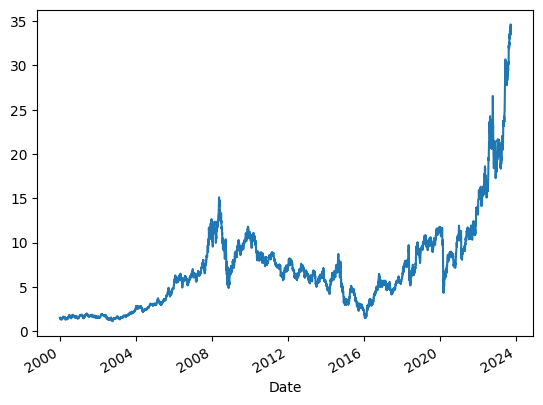

In [4]:
dados_ativo['Adj Close'].plot()

# Passo 3: Calcular os retornos

In [5]:
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.506322,35389440000,NaN
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.422993,28861440000,-0.055320
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.408634,43033600000,-0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.403763,34055680000,-0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.410173,20912640000,0.004566
...,...,...,...,...,...,...,...
2023-09-26,34.000000,34.090000,33.459999,33.459999,33.459999,60687500,-0.023066
2023-09-27,33.860001,34.520000,33.779999,34.520000,34.520000,53708700,0.031680
2023-09-28,34.450001,34.540001,34.209999,34.450001,34.450001,30765000,-0.002028


# Passo 4: Separar os retornos positivos dos negativos

In [6]:
retorno = 2

filtrando_retorno = lambda x: x if x > 0 else 0

filtrando_retorno(retorno)

2

In [7]:
dados_ativo['retornos_postivos'] = dados_ativo['retornos'].apply(lambda x: x if x > 0 else 0)
dados_ativo['retornos_negativos'] = dados_ativo['retornos'].apply(lambda x: abs(x) if x < 0 else 0)

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_postivos,retornos_negativos
Date,,,,,,,,,
2000-01-03,5.875000,5.875000,5.875000,5.875000,1.506322,35389440000,NaN,0.000000,0.000000
2000-01-04,5.550000,5.550000,5.550000,5.550000,1.422993,28861440000,-0.055320,0.000000,0.055320
2000-01-05,5.494000,5.494000,5.494000,5.494000,1.408634,43033600000,-0.010090,0.000000,0.010090
2000-01-06,5.475000,5.475000,5.475000,5.475000,1.403763,34055680000,-0.003458,0.000000,0.003458
2000-01-07,5.500000,5.500000,5.500000,5.500000,1.410173,20912640000,0.004566,0.004566,0.000000
...,...,...,...,...,...,...,...,...,...
2023-09-26,34.000000,34.090000,33.459999,33.459999,33.459999,60687500,-0.023066,0.000000,0.023066
2023-09-27,33.860001,34.520000,33.779999,34.520000,34.520000,53708700,0.031680,0.031680,0.000000
2023-09-28,34.450001,34.540001,34.209999,34.450001,34.450001,30765000,-0.002028,0.000000,0.002028


# Passo 5: Calcular a média de retornos positivos e negativos dos últimos 22 dias

In [8]:
dados_ativo['media_retornos_positivos'] = dados_ativo['retornos_postivos'].rolling(window = 22).mean()
dados_ativo['media_retornos_negativos'] = dados_ativo['retornos_negativos'].rolling(window = 22).mean()

dados_ativo = dados_ativo.dropna()

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_postivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos
Date,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.333254,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.358894,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.397353,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.432736,21199360000,0.025321,0.025321,0.000000,0.006801,0.005905
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.442222,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748
...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,34.000000,34.090000,33.459999,33.459999,33.459999,60687500,-0.023066,0.000000,0.023066,0.006218,0.004364
2023-09-27,33.860001,34.520000,33.779999,34.520000,34.520000,53708700,0.031680,0.031680,0.000000,0.007658,0.004054
2023-09-28,34.450001,34.540001,34.209999,34.450001,34.450001,30765000,-0.002028,0.000000,0.002028,0.007147,0.004146


# Passo 6: Calcular o RSI

### Fórmula RSI:

$100 - 100/(1 + mediaRetornosPositivos / mediaRetornosNegativos)$

In [9]:
dados_ativo['RSI'] = (100 - 100/
                        (1 + dados_ativo['media_retornos_positivos']/dados_ativo['media_retornos_negativos']))

dados_ativo.head(50)

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_postivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI
Date,,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.333254,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.210962
2000-02-02,5.300,5.300,5.300,5.300,1.358894,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950070
2000-02-03,5.450,5.450,5.450,5.450,1.397353,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026813
2000-02-04,5.588,5.588,5.588,5.588,1.432736,21199360000,0.025321,0.025321,0.000000,0.006801,0.005905,53.522979
2000-02-07,5.625,5.625,5.625,5.625,1.442222,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748,55.266291
2000-02-08,5.750,5.750,5.750,5.750,1.474272,31498240000,0.022223,0.022223,0.000000,0.007904,0.005748,57.896121
2000-02-09,5.625,5.625,5.625,5.625,1.442222,15600640000,-0.021740,0.000000,0.021740,0.006970,0.006736,50.853283
2000-02-10,5.463,5.463,5.463,5.463,1.400686,18600960000,-0.028800,0.000000,0.028800,0.006970,0.006928,50.152414
2000-02-11,5.288,5.288,5.288,5.288,1.355817,25297920000,-0.032034,0.000000,0.032034,0.006904,0.008384,45.159012


# Passo 7: Sinais de compra ou venda

In [10]:
dados_ativo.loc[dados_ativo['RSI'] < 30, 'compra'] = 'sim'
dados_ativo.loc[dados_ativo['RSI'] > 30, 'compra'] = 'nao'

dados_ativo

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_postivos,retornos_negativos,media_retornos_positivos,media_retornos_negativos,RSI,compra
Date,,,,,,,,,,,,,
2000-02-01,5.200000,5.200000,5.200000,5.200000,1.333254,23672320000,0.019408,0.019408,0.000000,0.003489,0.008878,28.210962,sim
2000-02-02,5.300000,5.300000,5.300000,5.300000,1.358894,14272000000,0.019231,0.019231,0.000000,0.004363,0.008878,32.950070,nao
2000-02-03,5.450000,5.450000,5.450000,5.450000,1.397353,25950720000,0.028302,0.028302,0.000000,0.005650,0.006364,47.026813,nao
2000-02-04,5.588000,5.588000,5.588000,5.588000,1.432736,21199360000,0.025321,0.025321,0.000000,0.006801,0.005905,53.522979,nao
2000-02-07,5.625000,5.625000,5.625000,5.625000,1.442222,20613120000,0.006621,0.006621,0.000000,0.007101,0.005748,55.266291,nao
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-09-26,34.000000,34.090000,33.459999,33.459999,33.459999,60687500,-0.023066,0.000000,0.023066,0.006218,0.004364,58.760428,nao
2023-09-27,33.860001,34.520000,33.779999,34.520000,34.520000,53708700,0.031680,0.031680,0.000000,0.007658,0.004054,65.389446,nao
2023-09-28,34.450001,34.540001,34.209999,34.450001,34.450001,30765000,-0.002028,0.000000,0.002028,0.007147,0.004146,63.286902,nao


In [11]:
datas_compra = []
datas_venda = []

for i in range(len(dados_ativo)):
    print(i)

    if "sim" in dados_ativo['compra'].iloc[i]:

        datas_compra.append(dados_ativo.iloc[i+1].name)

datas_compra

A saída de streaming foi truncada nas últimas 5000 linhas.
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1116
1117
1118
1119
1120
1121
1122
1123
1124
1125
1126
1127
1128
1129
1130
1131
1132
1133
1134
1135
1136
1137
1138
1139
1140
1141
1142
1143
1144


[Timestamp('2000-02-02 00:00:00'),
 Timestamp('2000-08-04 00:00:00'),
 Timestamp('2000-12-07 00:00:00'),
 Timestamp('2000-12-08 00:00:00'),
 Timestamp('2000-12-22 00:00:00'),
 Timestamp('2000-12-25 00:00:00'),
 Timestamp('2001-03-19 00:00:00'),
 Timestamp('2001-03-20 00:00:00'),
 Timestamp('2001-03-21 00:00:00'),
 Timestamp('2001-03-23 00:00:00'),
 Timestamp('2001-03-27 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-05 00:00:00'),
 Timestamp('2001-07-05 00:00:00'),
 Timestamp('2001-07-06 00:00:00'),
 Timestamp('2001-07-09 00:00:00'),
 Timestamp('2002-06-20 00:00:00'),
 Timestamp('2002-06-21 00:00:00'),
 Timestamp('2002-06-24 00:00:00'),
 Timestamp('2002-06-25 00:00:00'),
 Timestamp('2002-06-26 00:00:00'),
 Timestamp('2002-07-29 00:00:00'),
 Timestamp('2002-07-30 00:00:00'),
 Timestamp('2002-07-31 00:00:00'),
 Timestamp('2002-10-14 00:00:00'),
 Timestamp('2002-10-15 00:00:00'),
 Timestamp('2002-10-16 00:00:00'),
 Timestamp('2002-10-

# A gente vai ter 2 stops de venda:

* RSI acima de 40
* 10 dias de operação

In [12]:
data_compra = []
data_venda = []

for i in range(len(dados_ativo)):

    if "sim" in dados_ativo['compra'].iloc[i]:

        data_compra.append(dados_ativo.iloc[i+1].name) # +1 porque a gente compra no preço de abertura do dia seguinte.

        for j in range(1, 11):

            if dados_ativo['RSI'].iloc[i + j] > 40: #vendo se nos proximos 10 dias o RSI passa de 40

                data_venda.append(dados_ativo.iloc[i + j + 1].name) #vende no dia seguinte q bater 40
                break

            elif j == 10:
                data_venda.append(dados_ativo.iloc[i + j + 1].name)



data_venda

[Timestamp('2000-02-04 00:00:00'),
 Timestamp('2000-08-11 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-15 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2000-12-29 00:00:00'),
 Timestamp('2001-04-02 00:00:00'),
 Timestamp('2001-04-03 00:00:00'),
 Timestamp('2001-04-04 00:00:00'),
 Timestamp('2001-04-06 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-04-10 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2001-07-13 00:00:00'),
 Timestamp('2002-07-04 00:00:00'),
 Timestamp('2002-07-05 00:00:00'),
 Timestamp('2002-07-08 00:00:00'),
 Timestamp('2002-07-09 00:00:00'),
 Timestamp('2002-07-10 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-08-05 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-21 00:00:00'),
 Timestamp('2002-10-

# Passo 8: Observando pontos de compra ao longo do tempo

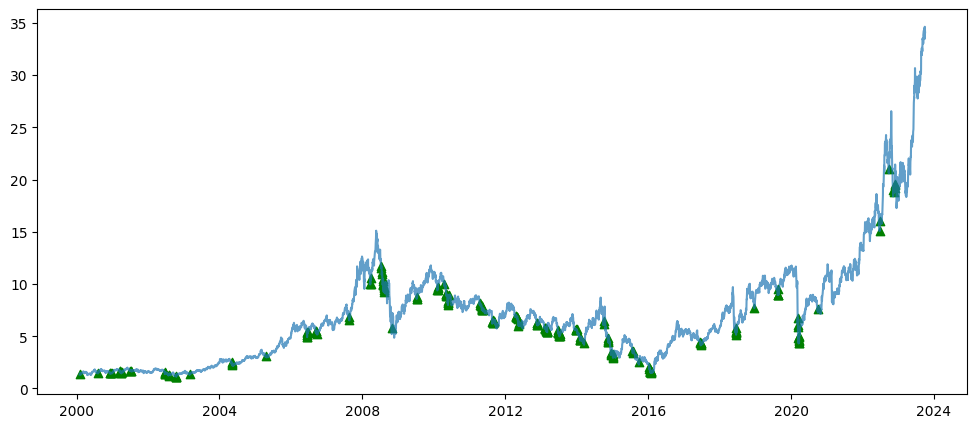

In [13]:
plt.figure(figsize = (12, 5))
plt.scatter(dados_ativo.loc[data_compra].index, dados_ativo.loc[data_compra]['Adj Close'], marker = '^',
            c = 'g')
plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

# Passo 9: Calculando lucros

In [14]:
lucros = dados_ativo.loc[data_venda]['Open'].values/dados_ativo.loc[data_compra]['Open'].values - 1

lucros

array([ 5.43395509e-02,  7.31183124e-02,  5.10998253e-02,  3.52297721e-02,
        2.41610290e-02,  1.73333062e-02, -1.30560927e-01, -1.23781649e-01,
       -6.84104924e-02,  4.76386364e-02,  5.88598601e-02,  1.44605114e-01,
        1.11231136e-01,  5.00000156e-02,  3.25670639e-02,  3.65384909e-02,
        3.25670639e-02, -3.30595603e-02,  1.08225106e-02,  7.12962491e-02,
        2.52796655e-02, -1.04925411e-02,  7.35181707e-02,  6.83544497e-02,
        4.22326257e-02,  9.19219804e-02,  8.43706531e-02,  1.13636361e-01,
        5.86011897e-02,  3.25570074e-02, -5.80002382e-02, -4.60526316e-02,
        1.44769674e-04,  2.11368670e-02,  1.64893942e-02, -4.46818878e-02,
       -1.18061091e-02,  4.90666707e-02,  6.75712831e-02,  7.78082234e-02,
       -6.81647194e-03, -2.86419715e-02, -4.51128567e-02, -5.85210426e-02,
        3.40478795e-02,  3.01507735e-02,  6.56619846e-02,  5.29674913e-02,
        1.27529396e-01,  1.08011377e-01,  8.32167405e-02, -9.50113054e-02,
       -1.54171910e-01, -

# Passo 10: Analisando lucros


* Qual a média de lucros?
* Qual a média de perdas?
* Qual a % de operações vencedoras?
* Qual expectativa matemática do modelo?
* Qual retorno acumulado?
* O retorno acumulado venceu o Buy and Hold na ação?

In [15]:
operacoes_vencedoras = len(lucros[lucros > 0])/len(lucros)

operacoes_vencedoras

0.5836909871244635

In [16]:
media_ganhos = np.mean(lucros[lucros > 0])

media_ganhos * 100

6.902665217758821

In [17]:
media_perdas = abs(np.mean(lucros[lucros < 0]))

media_perdas

0.05939926153741871

In [18]:
expectativa_matematica_modelo = (operacoes_vencedoras * media_ganhos) - ((1 - operacoes_vencedoras) * media_perdas)

expectativa_matematica_modelo * 100

1.5561786811254852

In [19]:
performance_acumulada = (np.cumprod((1 + lucros)) - 1)

performance_acumulada * 100

array([ 5.43395509e+00,  1.31431080e+01,  1.89247010e+01,  2.31143911e+01,
        2.60889615e+01,  2.82745001e+01,  1.15268625e+01, -2.27811640e+00,
       -8.96331858e+00, -4.62645521e+00,  9.87218289e-01,  1.55904865e+01,
        2.84477477e+01,  3.48701371e+01,  3.92624615e+01,  4.43509016e+01,
        4.90519867e+01,  4.41243936e+01,  4.56841813e+01,  5.60709170e+01,
        6.00163376e+01,  5.83373596e+01,  6.99780326e+01,  8.15967875e+01,
        8.92660967e+01,  1.06663811e+02,  1.24100172e+02,  1.49566100e+02,
        1.64190970e+02,  1.72792238e+02,  1.56970223e+02,  1.45136068e+02,
        1.45171556e+02,  1.50353715e+02,  1.54481896e+02,  1.43111164e+02,
        1.40240967e+02,  1.52028792e+02,  1.69058701e+02,  1.89993680e+02,
        1.88016946e+02,  1.79767573e+02,  1.67146459e+02,  1.51512769e+02,
        1.60076246e+02,  1.67917746e+02,  1.85509757e+02,  2.00632492e+02,
        2.38971972e+02,  2.75584802e+02,  3.06839745e+02,  2.68185370e+02,
        2.11421528e+02,  

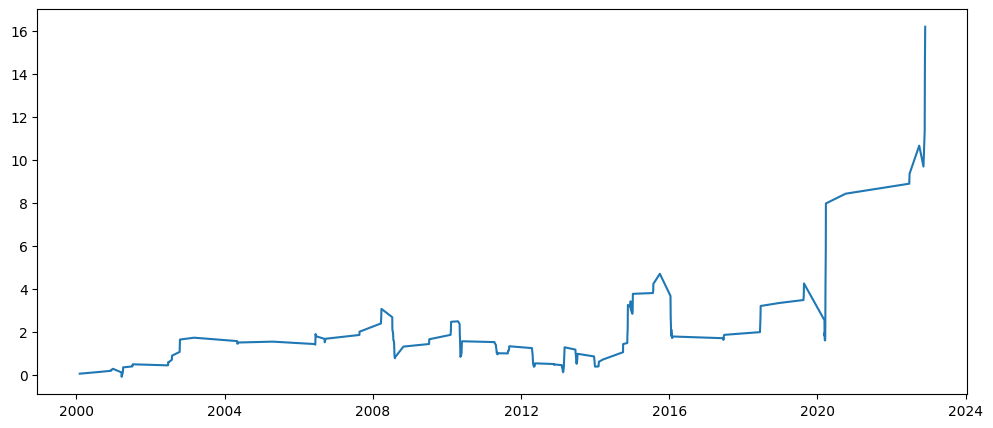

In [20]:
plt.figure(figsize = (12, 5))
plt.plot(data_compra, performance_acumulada)

In [21]:
retorno_buy_and_hold = dados_ativo['Adj Close'].iloc[-1]/dados_ativo['Adj Close'].iloc[0] - 1

retorno_buy_and_hold * 100

2459.1519996251836